<a href="https://colab.research.google.com/github/OzzyGomes/Machine-Learning-Projects/blob/main/Color_Old_Photographs_Using_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/Data Science and Machine Learn/Encoder Decoder/Images.zip'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow
import shutil
import os

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential

In [4]:
TRAIN_ROOT_DIR = '/content/Images/training_set'
DEST = '/content/train/images'

if not os.path.exists(DEST):
  os.makedirs(DEST)

  for dir in os.listdir(TRAIN_ROOT_DIR):
    for img in os.listdir(os.path.join(TRAIN_ROOT_DIR, dir)):
      ORG = os.path.join(TRAIN_ROOT_DIR, dir, img)
      try: 
        imread(ORG)
        shutil.copy(ORG, DEST)
      except:

        print(f'the image at {ORG} cannot be used')

In [5]:
len(os.listdir('/content/train/images'))

4746

In [6]:

train_datagen = ImageDataGenerator(rescale= 1/255,
                                   featurewise_center= True, 
                                   rotation_range= 40, 
                                   horizontal_flip= True, 
                                   vertical_flip= True)

train = train_datagen.flow_from_directory('/content/train', 
                                          target_size=(256,256), 
                                          batch_size=50, 
                                          shuffle= True)


Found 4746 images belonging to 1 classes.


In [7]:
# to visualize the image
t_img, label = train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [8]:
def plotImage(img_arr, label):
  """
  Input: Image array
  Output: Plots the image
  """


  plt.figure(figsize=(5,5))

  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()




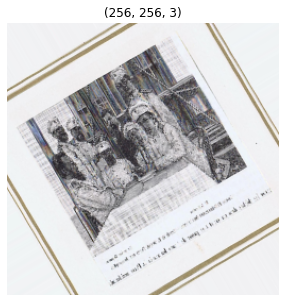

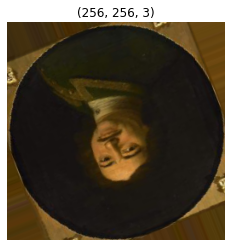

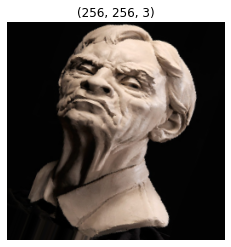

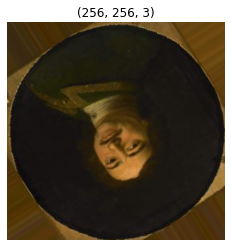

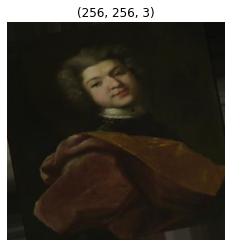

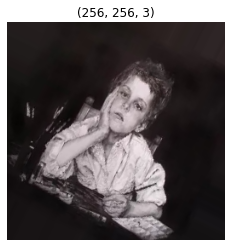

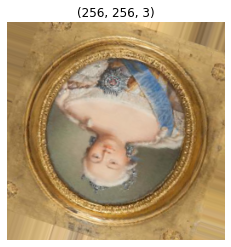

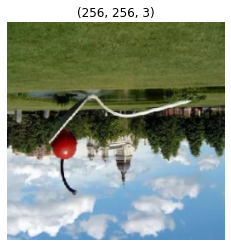

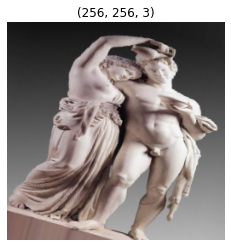

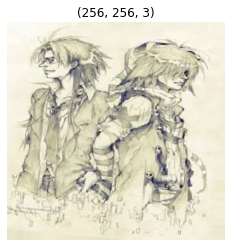

In [9]:
plotImage(t_img[:10], label[:10])

In [10]:
X = []
y = []

In [11]:
for img in t_img:
  try:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    y.append(lab[:,:,1:] / 128)
  except:
    print('error')

In [12]:
X_train = np.array(X)
X_train = np.expand_dims(X_train, axis= len(X_train.shape))

y_train = np.array(y)

X_train.shape, y_train.shape

((50, 256, 256, 1), (50, 256, 256, 2))

##Build our encoder decoder model

In [13]:
# buildinf the model
#encoder
model = Sequential()

model.add(Conv2D(64,(3,3), activation='relu', padding='same', strides=2, input_shape = (256,256,1)))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))

#decoding
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(16,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(2,(3,3), activation= LeakyReLU(alpha=0.01) , padding='same')) 
model.add(UpSampling2D((2,2)))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [14]:
model.compile(optimizer= 'adam', metrics= ['acc'], loss= 'mse')

In [15]:
his = model.fit(X_train, y_train, epochs= 30, batch_size= 32, steps_per_epoch= X_train.shape[0]//32, verbose= 1)

Epoch 1/30
1/1 [==============================] - 53s 53s/step - loss: 0.0102 - acc: 0.7549
Epoch 2/30
1/1 [==============================] - 21s 21s/step - loss: 1665.8607 - acc: 0.7993
Epoch 3/30
1/1 [==============================] - 37s 37s/step - loss: 0.0115 - acc: 0.3465
Epoch 4/30
1/1 [==============================] - 21s 21s/step - loss: 0.0112 - acc: 0.7188
Epoch 5/30
1/1 [==============================] - 37s 37s/step - loss: 0.0083 - acc: 0.7365
Epoch 6/30
1/1 [==============================] - 21s 21s/step - loss: 0.0753 - acc: 0.7095
Epoch 7/30
1/1 [==============================] - 37s 37s/step - loss: 0.0116 - acc: 0.7594
Epoch 8/30
1/1 [==============================] - 21s 21s/step - loss: 0.0103 - acc: 0.7449
Epoch 9/30
1/1 [==============================] - 37s 37s/step - loss: 0.0105 - acc: 0.7159
Epoch 10/30
1/1 [==============================] - 21s 21s/step - loss: 0.0142 - acc: 0.7974
Epoch 11/30
1/1 [==============================] - 37s 37s/step - loss: 0.01

In [16]:
model.save('./bestmodel.h5')

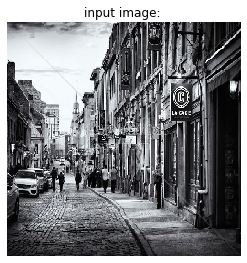

In [18]:
img1_color = []

path = '/content/people-walking-on-rue-saint-paul-historic-street-of-old-town-in-montreal-quebec-black-and-white-MXI29364.jpg'

img = img_to_array(
    load_img(path, target_size=(256,256,3))
)/255

plt.title('input image: ')

imshow(img)

plt.axis('off')
plt.show()

In [19]:
img1_color.append(img)
img1_color = rgb2lab(img1_color)[:,:,:,0]

img1_color = img1_color.reshape(img1_color.shape+(1,))

In [20]:
output1 = model.predict(img1_color)

output1 = output1*128

In [22]:
result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]

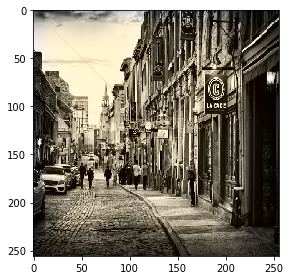

In [23]:
imshow(lab2rgb(result))